In [4]:
import matplotlib.pyplot as plt
import scanpy
import squidpy
import seaborn as sns
import anndata as ad
import pandas as pd
import numpy as np

In [5]:
data = scanpy.read_h5ad('adata_vis_human_spatial_paper.h5ad')

In [6]:
fdata = data[:, data.var.index[data.var['highly_variable']]]

In [8]:
fdata.var['highly_variable']

TSPAN6        True
TNMD          True
DPM1          True
FGR           True
CFH           True
              ... 
NEFL          True
AC007906.2    True
TRAC          True
SRD5A2        True
HIST1H3H      True
Name: highly_variable, Length: 4154, dtype: bool

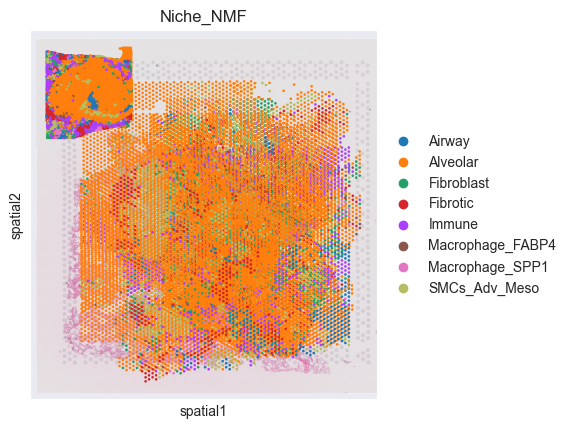

In [4]:
scanpy.pl.spatial(data, library_id='91_A1_RO-727_Healthy_processed_CM', color=['Niche_NMF'], size=1)#,crop_coord=[(2000, 2000, 4000, 4000)],)

In [5]:
data.obs

,in_tissue,array_row,array_col,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,leiden_25,sampleID,...,mean_nUMI_factorsfact_1,mean_nUMI_factorsfact_2,mean_nUMI_factorsfact_3,mean_nUMI_factorsfact_4,mean_nUMI_factorsfact_5,mean_nUMI_factorsfact_6,mean_nUMI_factorsfact_7,mean_nUMI_factorsfact_8,mean_nUMI_factorsfact_9,Niche_NMF
spot_id,,,,,,,,,,,,,,,,,,,,,
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1,1,50,102,90_A1_H237762_IPF_processed_CM,2869,7.962067,5180.0,8.552753,24,90_A1_H237762_IPF_processed_CM,...,0.000000,0.000000,2.004795,0.0,0.979459,0.000000,1.029371,0.000000,1.429611,Fibroblast
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1,1,59,19,90_A1_H237762_IPF_processed_CM,3827,8.250098,7457.0,8.917043,10,90_A1_H237762_IPF_processed_CM,...,3.705124,0.000000,0.000000,0.0,0.000000,0.377536,0.000000,0.000000,0.000000,Alveolar
90_A1_H237762_IPF_processed_CM_AAACAGCTTTCAGAAG-1,1,43,9,90_A1_H237762_IPF_processed_CM,3593,8.187021,7115.0,8.870101,11,90_A1_H237762_IPF_processed_CM,...,3.263140,0.181226,0.312994,0.0,0.000000,0.654990,0.000000,0.000000,0.000000,Alveolar
90_A1_H237762_IPF_processed_CM_AAACAGGGTCTATATT-1,1,47,13,90_A1_H237762_IPF_processed_CM,3108,8.042056,5879.0,8.679312,26,90_A1_H237762_IPF_processed_CM,...,0.000000,0.000000,1.081668,0.0,0.000000,0.470299,0.351993,0.000000,0.756844,SMCs_Adv_Meso
90_A1_H237762_IPF_processed_CM_AAACATTTCCCGGATT-1,1,61,97,90_A1_H237762_IPF_processed_CM,1341,7.201916,1925.0,7.563200,14,90_A1_H237762_IPF_processed_CM,...,0.000000,0.000000,2.409519,0.0,0.000000,0.000000,0.000000,0.000000,1.728636,Fibroblast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217_0004_processed_aligned_TGTTGGTGAGCGGACG-1,1,59,17,1217_0004_processed_aligned,2068,7.634821,2816.0,7.943428,6,1217_0004_processed_aligned,...,4.090339,0.249788,0.000000,0.0,0.000000,0.000000,0.000000,0.006176,0.000000,Alveolar
1217_0004_processed_aligned_TGTTGGTGCGCACGAG-1,1,24,108,1217_0004_processed_aligned,1041,6.948897,1220.0,7.107426,0,1217_0004_processed_aligned,...,1.073773,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,Alveolar
1217_0004_processed_aligned_TGTTGGTGCGCTTCGC-1,1,37,127,1217_0004_processed_aligned,2370,7.771067,3164.0,8.059908,0,1217_0004_processed_aligned,...,2.197537,0.000000,0.200295,0.0,0.000000,0.000000,0.034141,0.000000,0.042715,Alveolar


In [6]:
data.shape

(57787, 12486)

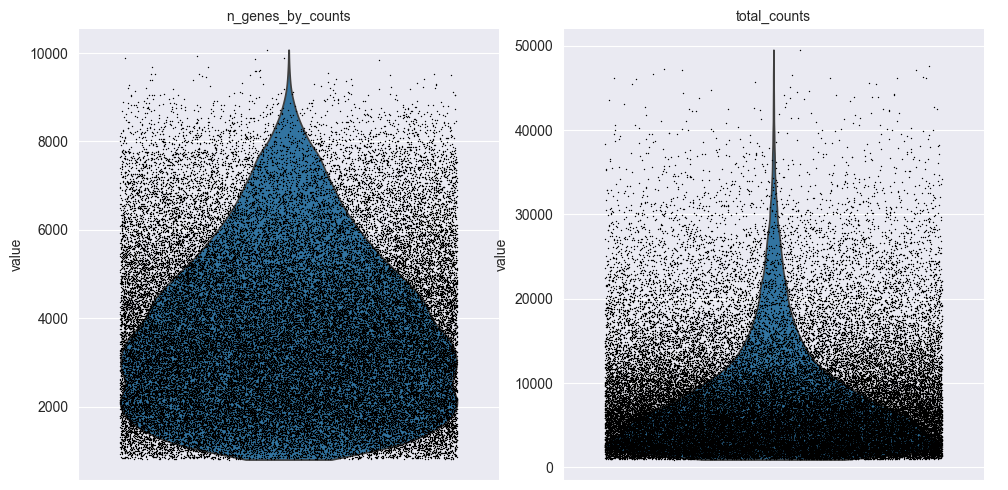

In [7]:
scanpy.pl.violin(
    data,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True
)

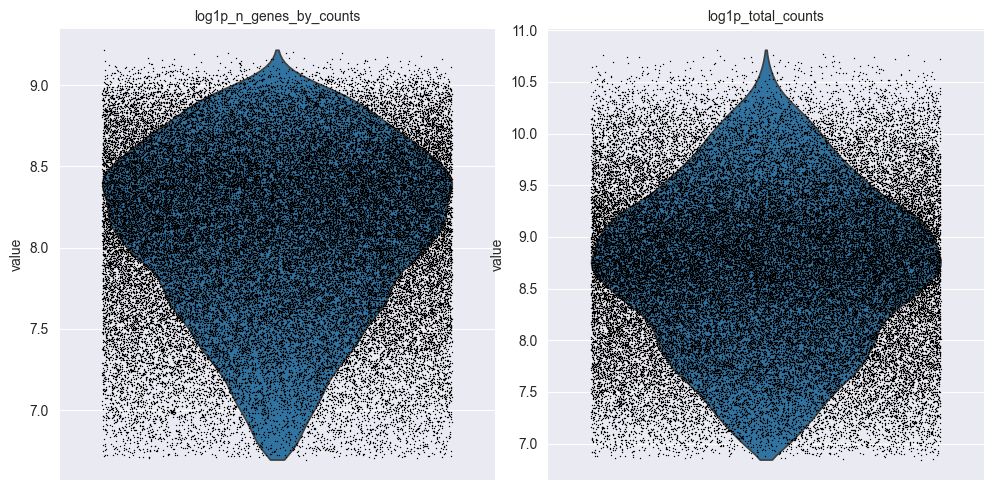

In [8]:
scanpy.pl.violin(
    data,
    ["log1p_n_genes_by_counts", "log1p_total_counts"],
    jitter=0.4,
    multi_panel=True
)

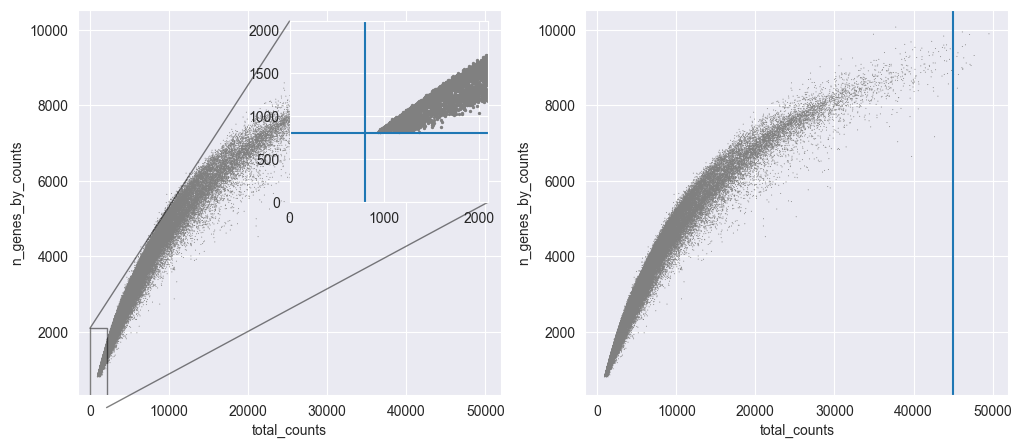

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1 = scanpy.pl.scatter(data, "total_counts", "n_genes_by_counts", show = False, ax=ax1)
#ax.set_ylim(0,2100)
#ax.set_xlim(0,2100)
axins = ax1.inset_axes(
    [0.5, 0.5, 0.47, 0.47],
    xlim=(0, 2100), ylim=(0, 2100))
axins.scatter(data.obs['total_counts'], data.obs['n_genes_by_counts'], c='grey', s=2)
axins.axhline(800)
axins.axvline(800)
ax1.indicate_inset_zoom(axins, edgecolor="black")

ax2 = scanpy.pl.scatter(data, "total_counts", "n_genes_by_counts", show = False, ax=ax2)
ax2.axvline(45000)


In [10]:
print(f'Number of cells before count filter: {data.n_obs}')
scanpy.pp.filter_cells(data, max_counts=45000, inplace=True)
print(f'Number of cells after count filter: {data.n_obs}')

Number of cells before count filter: 57787
Number of cells after count filter: 57787


(<matplotlib.patches.Rectangle at 0x1e72f4cfcd0>,
 (<matplotlib.patches.ConnectionPatch at 0x1e897547ed0>,
  <matplotlib.patches.ConnectionPatch at 0x1e8976faf90>))

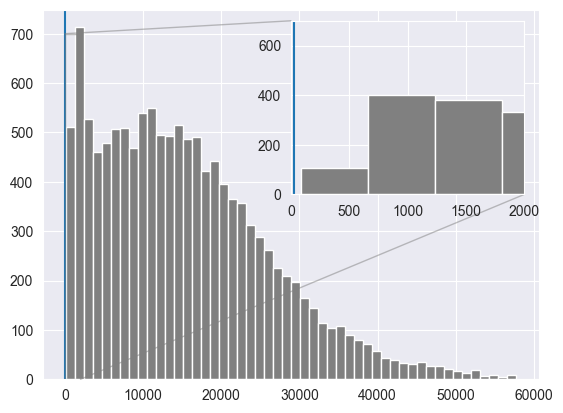

In [13]:
fig, histogramm = plt.subplots()
histogramm.hist(data.var['n_cells'], bins=50, color="grey")
histogramm.axvline(25)
axins = histogramm.inset_axes(
    [0.5, 0.5, 0.47, 0.47],
    xlim=(0,2000), ylim=(0, 700))
axins.hist(data.var['n_cells'], bins=100, color="grey")
axins.axvline(25)
histogramm.indicate_inset_zoom(axins)


In [ ]:
data.obs['total_counts'].describe()

In [17]:
squidpy.gr.spatial_neighbors(data)

In [18]:
scanpy.tl.leiden(data, key_added="cluster", resolution=0.37)

C:\Users\Rebeka\AppData\Local\Temp\ipykernel_20124\3469565750.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  scanpy.tl.leiden(data, key_added="cluster", resolution=0.37)


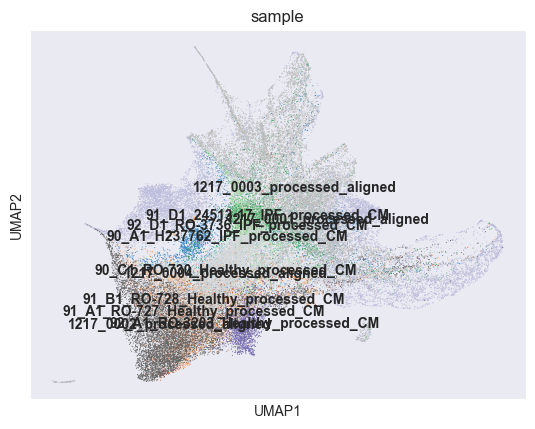

In [19]:
scanpy.pl.umap(
    data,
    color=["sample"],
    legend_loc="on data"
)

In [20]:
squidpy.gr.nhood_enrichment(data, cluster_key="Niche_NMF")

100%|██████████| 1000/1000 [00:20<00:00, 48.38/s]


In [21]:
data.uns['Niche_NMF_nhood_enrichment']

{'zscore': array([[ 13.56867212,  25.03799505,   6.24319248,  -8.6031814 ,
         -10.42303064,  10.42179777,  -3.49531591,  16.39086649],
        [ 21.99880979, -39.67668306,   6.79427334,  -9.20166057,
          14.56615436,  -8.44316524,   8.00129489,   5.44820713],
        [  8.03527658,  14.24942166,   5.42312157,  -4.55478484,
           6.54280469,  -1.99849812,  -6.46229395,  -0.7497853 ],
        [ -8.6443468 ,  -8.99751369,  -4.07516   ,  20.70026355,
          -7.71892935,   9.78776618,  -9.05484001,  -2.18040753],
        [-10.06065528,  14.65360808,   7.10003533,  -7.72529301,
          13.5376243 ,   5.13911999,  -9.33122533,   4.925557  ],
        [ 10.44145729,  -6.23206505,  -2.05635716,   9.62509599,
           5.54706936,   2.21842593,   8.17746288,   4.31672342],
        [ -3.84818142,   9.47819313,  -4.7915488 ,  -8.93792415,
          -8.91632393,   7.8885614 ,  23.64301068,  15.11515219],
        [ 17.55712914,   9.49765537,  -2.14366953,  -0.99816105,
        

C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\anndata\_core\anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\squidpy\pl\_utils.py:557: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


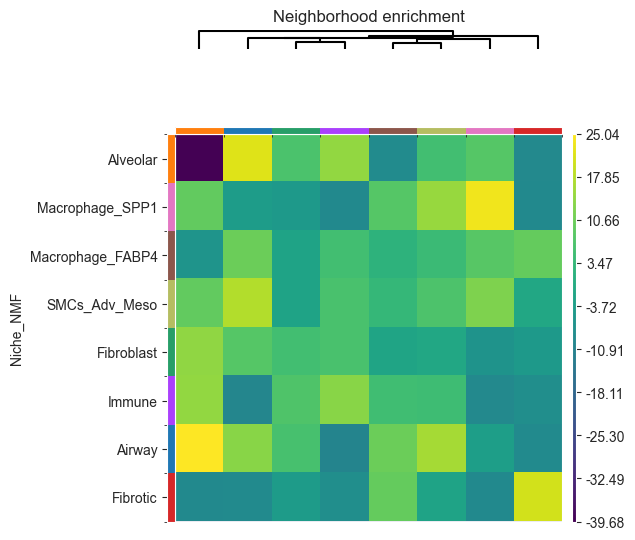

In [22]:
squidpy.pl.nhood_enrichment(data, cluster_key="Niche_NMF", method="average", figsize=(5, 5))

In [23]:
squidpy.gr.interaction_matrix(data, cluster_key="cluster")

In [24]:
#squidpy.pl.interaction_matrix(data, cluster_key="cluster", method="average", figsize=(5, 5))

In [25]:
squidpy.gr.co_occurrence(data, cluster_key="Niche_NMF")

100%|██████████| 435/435 [03:11<00:00,  2.27/s]


In [26]:
cs = data.obs["Niche_NMF"].unique()

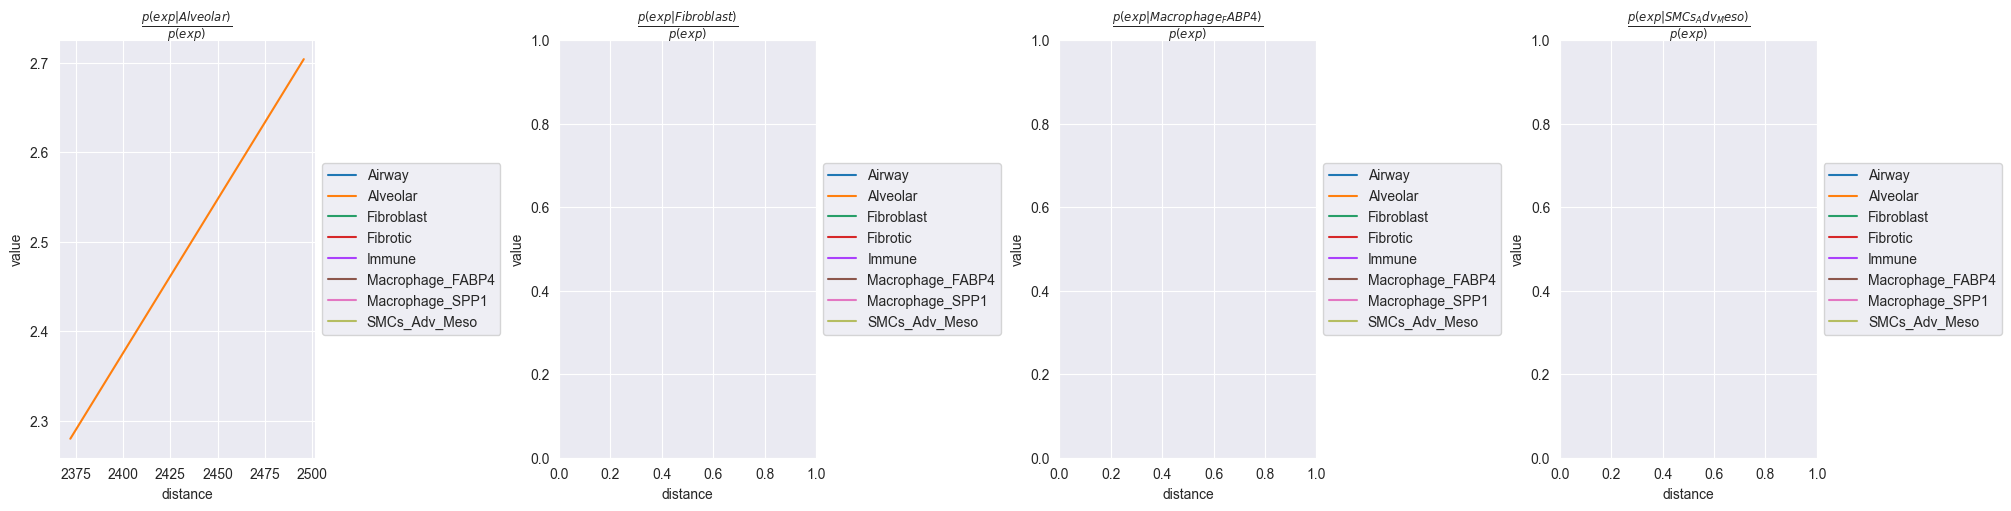

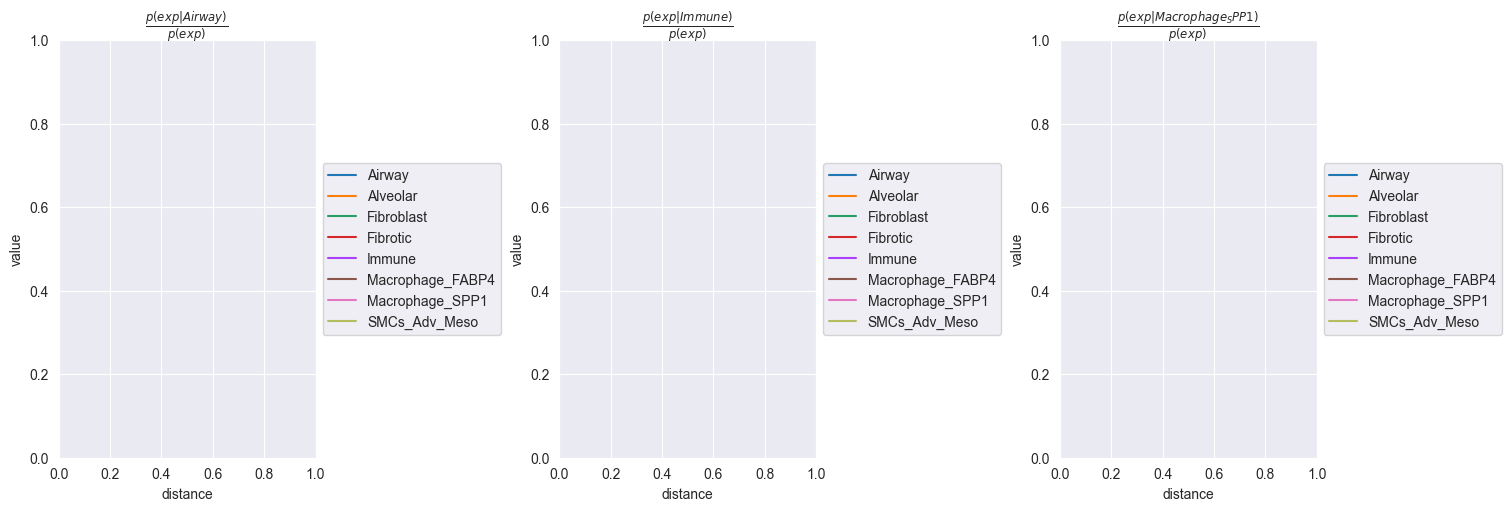

In [27]:
squidpy.pl.co_occurrence(data, cluster_key="Niche_NMF", clusters=data.obs["Niche_NMF"].unique()[0:4])
squidpy.pl.co_occurrence(data, cluster_key="Niche_NMF", clusters=data.obs["Niche_NMF"].unique()[5:9])

<BarContainer object of 8 artists>

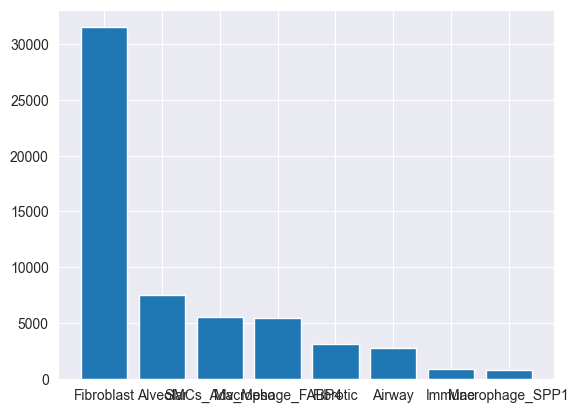

In [30]:
label_counts = data.obs['Niche_NMF'].value_counts()
plt.bar(data.obs['Niche_NMF'].unique(), label_counts)

In [32]:
data.X.shape

(57787, 12486)

In [39]:
data.X[0]

<1x12486 sparse matrix of type '<class 'numpy.float32'>'
	with 2672 stored elements in Compressed Sparse Row format>